# Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate

In [1]:
# Imports
from vega_datasets import data
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Part I
Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min data.sf_temps()and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#Loading in dataset
sf_temp_ds= data.sf_temps()

In [3]:
#Looking at first 5 values of dataset
sf_temp_ds.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
#Looking at datatypes
sf_temp_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

sf_temp_ds = sf_temp_ds.set_index('date').sort_index()

In [6]:
# resample the whole dataframe temparature using mean as an aggregator

sf_temp_ds.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


<AxesSubplot:xlabel='date'>

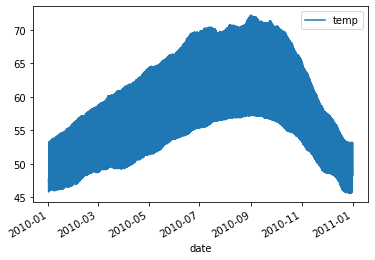

In [7]:
# use pandas .plot()
sf_temp_ds.plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

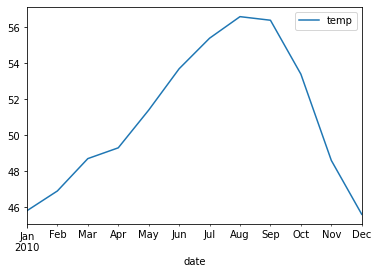

In [8]:
sf_temp_ds.resample('M').min().plot()

# 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

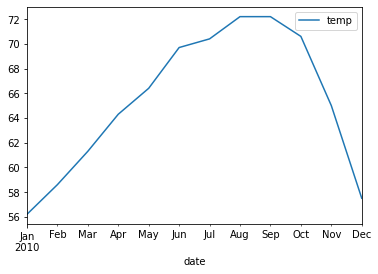

In [9]:
sf_temp_ds.resample('M').max().plot()

# 4. Which month is the coldest, on average?

In [10]:
#Print out first index by indexing
sf_temp_ds.resample('M').mean().sort_values(by='temp')[:1]

,temp
date,
2010-01-31,49.98414


# 5. Which month has the highest average temperature?

In [11]:
#Print out last value using tail function
sf_temp_ds.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
#Resample by the day and calculate the min and max temp for the day
sf_df= sf_temp_ds.resample('D').agg(['min', 'max'])

In [14]:
#Looking at first 5 values
sf_df.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [17]:
#Creating difference column
sf_df['diff']= sf_df.temp['max'] - sf_df.temp['min']

In [28]:
#Groupby month, aggregate by mean, sort values, and print last row
sf_df.resample('M').mean().sort_values(by='diff').tail(1)

temp                  diff
                  min        max           
date                                       
2010-09-30  56.903333  71.306667  14.403333

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

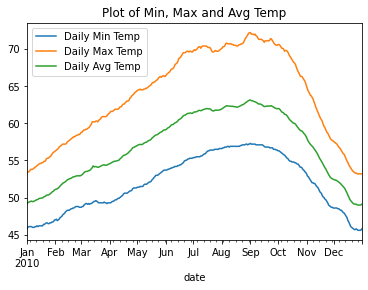

In [54]:
# %matplotlib notebook


sf_temp_ds.resample('D').min().temp.plot(label= "Daily Min Temp")
sf_temp_ds.resample('D').max().temp.plot(label= "Daily Max Temp")
sf_temp_ds.resample('D').mean().temp.plot(label= "Daily Avg Temp")
plt.title('Plot of Min, Max and Avg Temp')
plt.legend()
plt.show()

# Part II
Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
seattle_df= data.seattle_weather()

# Part III
- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [ ]:
data.flights_20k()